## Import libraries and data

In [ ]:
#Import dataset with key telecom customer data

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
from seaborn import diverging_palette

In [2]:
data = pd.read_csv('churn.csv')

## Take a Quick Look at the Data Structure

In [3]:
data.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
0,KS,415,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,No,Yes,25,1,False
1,OH,415,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,No,Yes,26,1,False
2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,No,No,0,0,False
3,OH,408,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,Yes,No,0,2,False
4,OK,415,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,Yes,No,0,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Area_code               2666 non-null   int64  
 2   Account_length          2666 non-null   int64  
 3   Total_day_minutes       2666 non-null   float64
 4   Total_day_calls         2666 non-null   int64  
 5   Total_day_charge        2666 non-null   float64
 6   Total_eve_minutes       2666 non-null   float64
 7   Total_eve_calls         2666 non-null   int64  
 8   Total_eve_charge        2666 non-null   float64
 9   Total_night_minutes     2666 non-null   float64
 10  Total_night_calls       2666 non-null   int64  
 11  Total_night_charge      2641 non-null   float64
 12  Total_intl_minutes      2666 non-null   float64
 13  Total_intl_calls        2666 non-null   int64  
 14  Total_intl_charge       2666 non-null   

Note that the "Total night charge" variable is missing values. We will have to impute these later.

In [5]:
data.describe()

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2641.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,437.438860,100.620405,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.050292,10.237022,4.467367,2.764490,8.021755,1.562641
std,42.521018,39.563974,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.283425,2.788349,2.456195,0.752812,13.612277,1.311236
min,408.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,73.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.510000,8.500000,3.000000,2.300000,0.000000,1.000000
50%,415.000000,100.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,0.000000,1.000000
75%,510.000000,127.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.630000,12.100000,6.000000,3.270000,19.000000,2.000000
max,510.000000,243.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,50.000000,9.000000


#### Visualize the churn percentage for the various area codes (by location)  

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 14))


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
37.3382, -121.8863
37.8044, -122.2712
37.7749, -122.4194
"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values


map = Basemap(llcrnrlat = 37,llcrnrlon = -123,urcrnrlat = 38,urcrnrlon = -121,
              projection='merc',
              lat_0=(-121 +123)/2,
              lon_0=(38-37)/2,resolution='l')# Get the area of interest imagery
#map.drawcoastlines(color='red',linewidth=1)
map.drawcountries(color='black',linewidth=1)
map.drawstates(color='black',linewidth=1)
map.drawcounties(color='black',linewidth=1)

# convert lat and lon to map projection coordinates
lons, lats = map(lon, lat)
# plot points as red dots
dem = data.loc[data['Churn'] == False].Area_code.value_counts().tolist()
num = data.loc[data['Churn'] == True].Area_code.value_counts().tolist()
Churn_list = [100*num[0]/dem[0],100*num[1]/dem[1],100*num[2]/dem[2]]
print(Churn_list)
cities = ['San Francisco - 415','Oakland - 510','San Jose - 408']
color_list = ['g','b','r']
for j in range(3):
    map.scatter([], [], color = color_list[j], alpha=0.5, s=100, label=cities[j])
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Area code')
for i in range(3):
    area = (3.142 * (Churn_list[i])**2)  # 0 to 15 point radii
    map.scatter(lons[i], lats[i],  s=area*15, color=color_list[i],alpha=0.5, zorder=5,label=cities[i])
plt.show()

### Create histograms of numberical variables

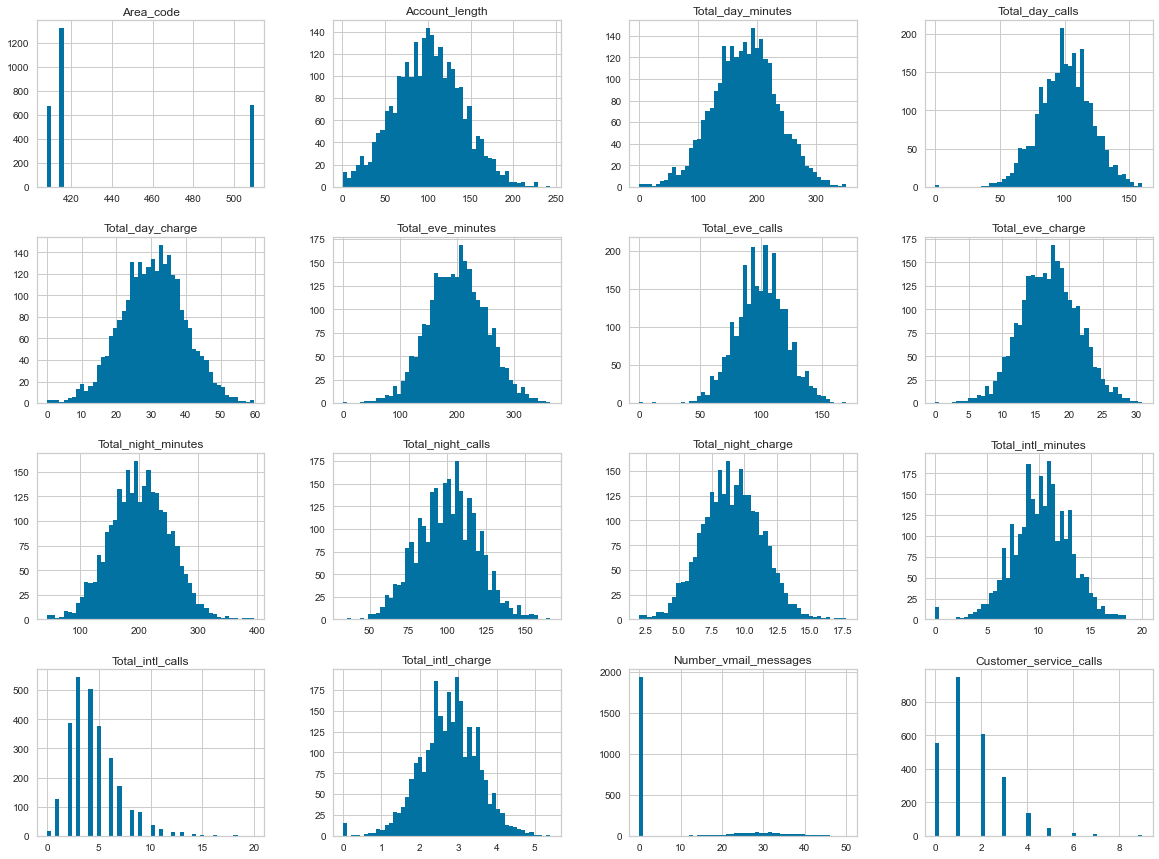

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Corelation Analysis

In [8]:
corr = data.corr()['Churn'].sort_values()
corr

Number_vmail_messages    -0.086474
Total_intl_calls         -0.069882
Total_eve_calls          -0.001539
Area_code                 0.001019
Total_night_calls         0.012262
Account_length            0.017728
Total_day_calls           0.018290
Total_night_minutes       0.033639
Total_night_charge        0.035743
Total_eve_charge          0.072893
Total_eve_minutes         0.072906
Total_intl_minutes        0.086204
Total_intl_charge         0.086216
Total_day_minutes         0.195688
Total_day_charge          0.195689
Customer_service_calls    0.202590
Churn                     1.000000
Name: Churn, dtype: float64

### Correlation Matrix

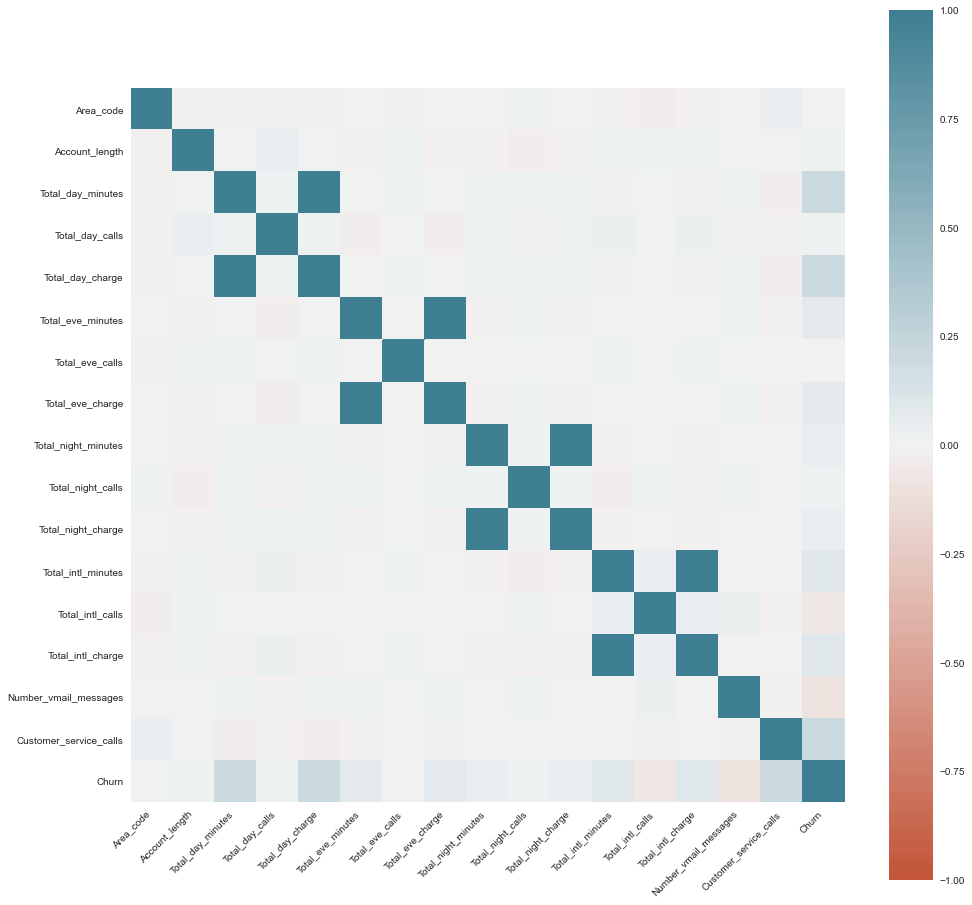

In [15]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Pair plots for the three most correlated variables (positive)

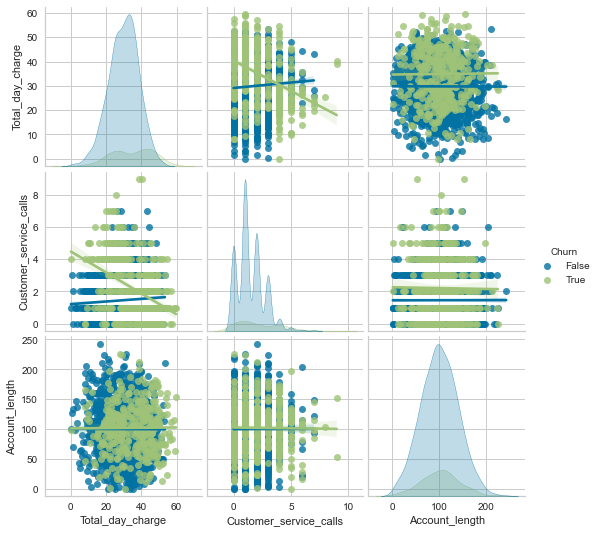

In [14]:
from seaborn import pairplot
new_data = data.copy()
vars = ["Total_day_charge", "Customer_service_calls", "Account_length"]

p = pairplot(
    new_data, vars=vars,hue="Churn",kind="reg", plot_kws={ 'scatter_kws': {'alpha': 0.8}})
#p.fig.savefig("images/mlpr_0606.png", dpi=300)


### Pair plots for the three most correlated variables (negative)

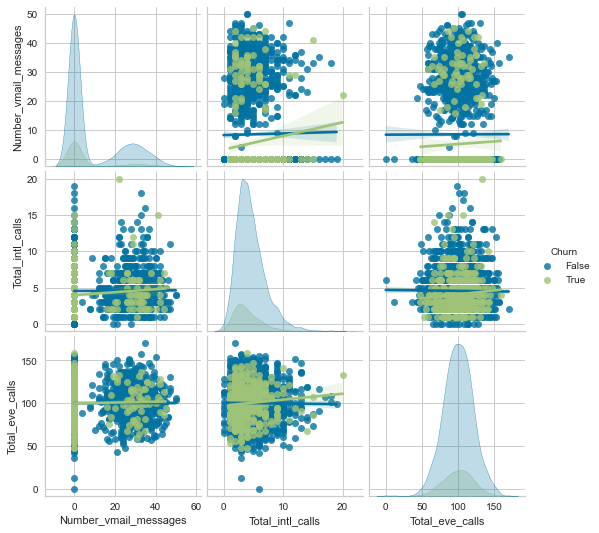

In [13]:
from seaborn import pairplot
new_data = data.copy()
vars = ["Number_vmail_messages", "Total_intl_calls", "Total_eve_calls"]

p = pairplot(
    new_data, vars=vars,hue="Churn",kind="reg", plot_kws={ 'scatter_kws': {'alpha': 0.8}})

## Create a Test Set

In [7]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [8]:

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)

2133

In [10]:
len(test_set)

533

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
data_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [13]:
test_set.head()

,index,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,...,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
2,2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,No,No,0,0,False
5,5,AL,510,118,223.4,98,37.98,220.6,101,18.75,...,118,9.18,6.3,6,1.70,Yes,No,0,0,False
12,12,IA,415,62,120.7,70,20.52,307.2,76,26.11,...,99,9.14,13.1,6,3.54,No,No,0,4,False
16,16,TX,415,73,224.4,90,38.15,159.5,88,13.56,...,74,8.68,13.0,2,3.51,No,No,0,1,False
23,23,MT,408,54,134.3,73,22.83,155.5,100,13.22,...,68,4.59,14.7,4,3.97,No,No,0,3,False


In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
test_set.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
2087,OH,510,115,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,Yes,No,0,1,True
1915,WY,415,157,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,Yes,No,0,0,False
479,AZ,415,84,159.0,80,27.03,167.9,128,14.27,167.6,101,7.54,12.3,5,3.32,No,No,0,1,False
1898,FL,415,105,273.8,97,46.55,289.7,106,24.62,269.1,126,12.11,5.8,3,1.57,No,No,0,2,True
741,KY,510,74,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,Yes,No,0,1,True


### Create Histogram of target variable - Body Mass Index (BMI)

In [16]:
## Convert categorical target variable, Churn, into a numerical binary varible

churn_mapper = {True:1, False:0}

data["Churn"] = data["Churn"].replace(churn_mapper)

In [17]:
data["Churn"].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [18]:
data.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
0,KS,415,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,No,Yes,25,1,0
1,OH,415,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,No,Yes,26,1,0
2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,No,No,0,0,0
3,OH,408,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,Yes,No,0,2,0
4,OK,415,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,Yes,No,0,3,0


<AxesSubplot:>

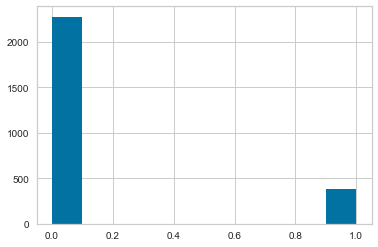

In [19]:
data["Churn"].hist()

### Exploring the U.S. state the customers come from

,Overall,Stratified,Random,Rand. %error,Strat. %error
AK,0.016129,0.016854,0.016854,4.494382,4.494382
AL,0.024756,0.024345,0.026217,5.901714,-1.662694
AR,0.017629,0.016854,0.009363,-46.888198,-4.398757
AZ,0.016879,0.016854,0.022472,33.133583,-0.149813
CA,0.009002,0.009363,0.013109,45.614856,4.010612
CO,0.022131,0.022472,0.028090,26.928204,1.542563
CT,0.022131,0.022472,0.018727,-15.381197,1.542563
DC,0.016879,0.016854,0.026217,55.322514,-0.149813
DE,0.019130,0.018727,0.011236,-41.264596,-2.107660
FL,0.020255,0.020599,0.024345,20.190040,1.699265


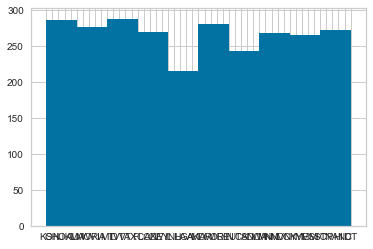

In [20]:
data["State"].hist()


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["State"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_test_set["State"].value_counts() / len(strat_test_set)

data["State"].value_counts() / len(data)

def state_proportions(data):
    return data["State"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": state_proportions(data),
    "Stratified": state_proportions(strat_test_set),
    "Random": state_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

# Discover and Visualize the Data to Gain Insights

In [21]:
data = strat_train_set.copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total_intl_calls', ylabel='Total_night_calls'>

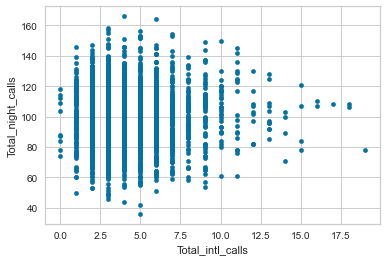

In [22]:
data.plot(kind="scatter", x="Total_intl_calls", y="Total_night_calls")

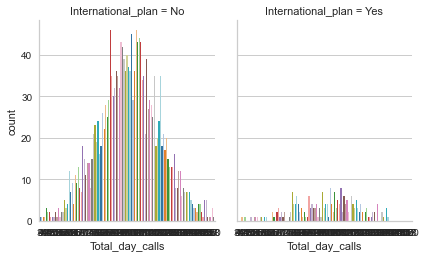

In [23]:
import seaborn as sns

# Plot
calls_by_plan_type = sns.catplot(x="Total_day_calls", col="International_plan", col_wrap=4,
                        data=data[data.Total_day_calls.notnull()],
                        kind="count", height=3.5, aspect=.8, 
                        palette='tab20')

## Looking for Correlations

In [24]:
corr_matrix = data.corr()

In [25]:
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Customer_service_calls    0.192191
Total_day_charge          0.182078
Total_day_minutes         0.182077
Total_intl_minutes        0.085530
Total_intl_charge         0.085526
Total_eve_minutes         0.073304
Total_eve_charge          0.073283
Total_night_charge        0.036185
Total_night_minutes       0.034948
Total_night_calls         0.019572
Account_length            0.016928
Area_code                 0.015960
Total_day_calls           0.013001
Total_eve_calls          -0.014594
Total_intl_calls         -0.093527
Number_vmail_messages    -0.094235
Name: Churn, dtype: float64

In [26]:
corr_matrix

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls,Churn
Area_code,1.000000,-0.014936,-0.016405,-0.015130,-0.016400,0.006244,-0.009776,0.006274,0.004190,0.021105,0.005110,-0.022624,-0.035026,-0.022752,-0.010472,0.039723,0.015960
Account_length,-0.014936,1.000000,0.010797,0.042693,0.010795,-0.021568,0.010514,-0.021556,-0.016628,-0.026586,-0.016439,0.023125,0.021933,0.023128,-0.004485,0.003026,0.016928
Total_day_minutes,-0.016405,0.010797,1.000000,0.006302,1.000000,0.011228,-0.010007,0.011221,0.002944,-0.001205,0.002909,-0.020032,-0.001589,-0.019950,0.020049,-0.034653,0.182077
Total_day_calls,-0.015130,0.042693,0.006302,1.000000,0.006311,-0.028182,0.015743,-0.028190,0.015791,-0.014636,0.019464,0.041783,-0.009280,0.041835,-0.004241,-0.016084,0.013001
Total_day_charge,-0.016400,0.010795,1.000000,0.006311,1.000000,0.011239,-0.010005,0.011232,0.002949,-0.001202,0.002912,-0.020040,-0.001585,-0.019958,0.020045,-0.034662,0.182078
Total_eve_minutes,0.006244,-0.021568,0.011228,-0.028182,0.011239,1.000000,-0.011609,1.000000,-0.007775,0.026224,-0.007380,-0.005790,0.011833,-0.005939,0.012179,0.001567,0.073304
Total_eve_calls,-0.009776,0.010514,-0.010007,0.015743,-0.010005,-0.011609,1.000000,-0.011597,-0.002882,-0.002000,-0.002100,0.035955,0.025609,0.035969,0.011075,-0.024341,-0.014594
Total_eve_charge,0.006274,-0.021556,0.011221,-0.028190,0.011232,1.000000,-0.011597,1.000000,-0.007786,0.026237,-0.007394,-0.005811,0.011845,-0.005960,0.012199,0.001564,0.073283
Total_night_minutes,0.004190,-0.016628,0.002944,0.015791,0.002949,-0.007775,-0.002882,-0.007786,1.000000,0.013854,0.999999,0.009253,-0.003215,0.009380,0.005224,0.000274,0.034948
Total_night_calls,0.021105,-0.026586,-0.001205,-0.014636,-0.001202,0.026224,-0.002000,0.026237,0.013854,1.000000,0.014851,-0.025515,0.026697,-0.025503,0.014845,-0.000099,0.019572


<AxesSubplot:>

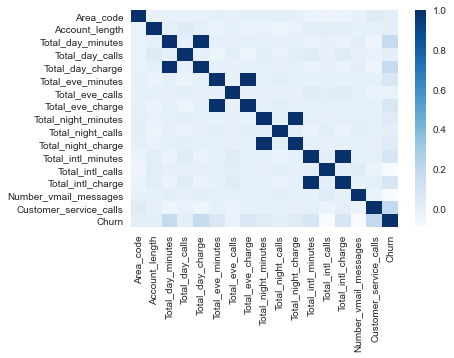

In [27]:
sns.heatmap(corr_matrix, cmap = 'Blues')

Note that there is very high correlation between the minutes and charge variables. This is becuase charge is a factor of minutes since the customers are charged a rate per minute. Therefore we need to remove one of the varibales for each pair of correlated variables before we use these variables as predictors in a model.

array([[<AxesSubplot:xlabel='Churn', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_night_calls', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_intl_minutes', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_day_minutes', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_intl_calls', ylabel='Churn'>],
       [<AxesSubplot:xlabel='Churn', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_night_calls', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_intl_minutes', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_day_minutes', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_intl_calls', ylabel='Total_eve_calls'>],
       [<AxesSubplot:xlabel='Churn', ylabel='Total_night_calls'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Total_night_calls'>,
        <AxesSubplot:xlabel='Tot

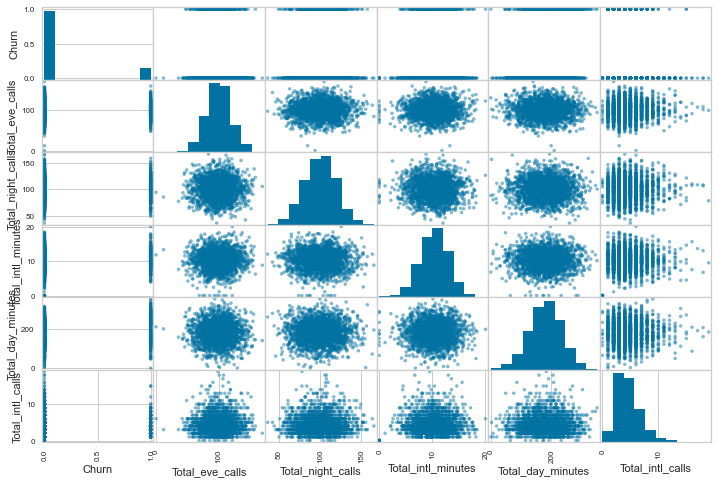

In [28]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Churn", "Total_eve_calls", "Total_night_calls",
              "Total_intl_minutes", "Total_day_minutes", "Total_intl_calls"]
scatter_matrix(data[attributes], figsize=(12, 8))


## Experimenting with Attribute Combinations

In [29]:
data["Total_calls"] = data["Total_day_calls"]+data["Total_eve_calls"]+data['Total_night_calls']+data['Total_intl_calls']
data["Total_mins"] = data["Total_day_minutes"]+data["Total_eve_minutes"]+data['Total_night_minutes']+data['Total_intl_minutes']
data["Total_charges"] = data["Total_day_charge"]+data["Total_eve_charge"]+data['Total_night_charge']+data['Total_intl_charge']





In [30]:
corr_matrix = data.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Total_charges             0.205578
Customer_service_calls    0.192191
Total_day_charge          0.182078
Total_day_minutes         0.182077
Total_mins                0.172679
Total_intl_minutes        0.085530
Total_intl_charge         0.085526
Total_eve_minutes         0.073304
Total_eve_charge          0.073283
Total_night_charge        0.036185
Total_night_minutes       0.034948
Total_night_calls         0.019572
Account_length            0.016928
Area_code                 0.015960
Total_day_calls           0.013001
Total_calls               0.003396
Total_eve_calls          -0.014594
Total_intl_calls         -0.093527
Number_vmail_messages    -0.094235
Name: Churn, dtype: float64

In [31]:
# Drop the three attributes we added by combining existing attributes because we will add them in later in script
# using the custom transformer function:

data = data.drop(columns=['Total_calls', 'Total_mins', 'Total_charges'])



# Prepare the Data for Machine Learning Algorithms

In [32]:
data = strat_train_set.drop("Churn", axis=1) # drop labels for training set
data_labels = strat_train_set["Churn"].copy()

## Data Cleaning

In [33]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls
285,AK,510,59,182.5,104,31.03,204.7,95,17.40,229.9,100,NaN,11.3,8,3.05,No,No,0,4
90,MA,415,103,185.0,117,31.45,223.3,94,18.98,222.8,91,NaN,12.6,2,3.40,No,No,0,2
324,DC,415,66,167.3,91,28.44,230.0,68,19.55,191.7,118,NaN,10.6,5,2.86,No,No,0,1
46,IN,408,81,175.5,67,29.84,249.3,85,21.19,270.2,98,NaN,10.2,3,2.75,No,No,0,1
384,GA,510,141,149.7,112,25.45,162.5,118,13.81,220.3,115,NaN,7.6,2,2.05,No,Yes,23,3


We need to impute the missing values for the Total_night_charge variable. We can do this using the median value from this column.

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [35]:
data_num = data.select_dtypes(include=[np.number])

In [36]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([415.   , 100.   , 181.45 , 101.   ,  30.85 , 201.35 , 100.   ,
        17.115, 198.8  , 100.   ,   8.94 ,  10.3  ,   4.   ,   2.78 ,
         0.   ,   1.   ])

Check that this is the same as manually computing the median of each attribute:

In [38]:
data_num.median().values

array([415.   , 100.   , 181.45 , 101.   ,  30.85 , 201.35 , 100.   ,
        17.115, 198.8  , 100.   ,   8.94 ,  10.3  ,   4.   ,   2.78 ,
         0.   ,   1.   ])

Transform the training set:

In [39]:
X = imputer.transform(data_num)

In [40]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.index)

In [41]:
data_tr.loc[sample_incomplete_rows.index.values]

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
285,510.0,59.0,182.5,104.0,31.03,204.7,95.0,17.40,229.9,100.0,8.94,11.3,8.0,3.05,0.0,4.0
90,415.0,103.0,185.0,117.0,31.45,223.3,94.0,18.98,222.8,91.0,8.94,12.6,2.0,3.40,0.0,2.0
324,415.0,66.0,167.3,91.0,28.44,230.0,68.0,19.55,191.7,118.0,8.94,10.6,5.0,2.86,0.0,1.0
46,408.0,81.0,175.5,67.0,29.84,249.3,85.0,21.19,270.2,98.0,8.94,10.2,3.0,2.75,0.0,1.0
384,510.0,141.0,149.7,112.0,25.45,162.5,118.0,13.81,220.3,115.0,8.94,7.6,2.0,2.05,23.0,3.0


In [42]:
imputer.strategy

'median'

In [43]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

In [44]:
data_tr.head()

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
1740,415.0,156.0,174.5,65.0,29.67,197.4,116.0,16.78,238.5,86.0,10.73,10.6,2.0,2.86,0.0,0.0
461,415.0,92.0,201.9,74.0,34.32,226.8,119.0,19.28,217.5,80.0,9.79,13.7,6.0,3.70,0.0,3.0
1046,408.0,185.0,151.1,121.0,25.69,244.7,88.0,20.80,154.4,91.0,6.95,13.8,2.0,3.73,29.0,2.0
1638,415.0,97.0,215.3,58.0,36.60,242.4,91.0,20.60,279.8,105.0,12.59,12.1,9.0,3.27,0.0,0.0
414,510.0,148.0,93.6,137.0,15.91,193.8,72.0,16.47,144.9,84.0,6.52,17.5,5.0,4.73,14.0,1.0


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `State, Area_code, International_plan, and Voice_mail_plan`:

In [45]:
data_cat = data[["State", "Area_code", "International_plan", "Voice_mail_plan"]]
data_cat.head(10)

,State,Area_code,International_plan,Voice_mail_plan
1740,IL,415,No,No
461,FL,415,No,No
1046,MT,408,No,Yes
1638,CT,415,No,No
414,ID,510,No,Yes
1873,UT,415,No,No
835,AK,408,No,No
1650,AK,510,No,No
1218,AR,415,No,No
734,NC,415,No,No


In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[14.,  1.,  0.,  0.],
       [ 9.,  1.,  0.,  0.],
       [26.,  0.,  0.,  1.],
       [ 6.,  1.,  0.,  0.],
       [13.,  2.,  0.,  1.],
       [44.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 2.,  1.,  0.,  0.],
       [27.,  1.,  0.,  0.]])

In [47]:
ordinal_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([408, 415, 510], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [49]:
cat_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([408, 415, 510], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

## Custom Transformers


Let's create a custom transformer to add extra attributes:

In [50]:
col_names = "Total_day_calls", "Total_eve_calls", "Total_night_calls", "Total_intl_calls", "Total_day_minutes", "Total_eve_minutes", "Total_night_minutes", "Total_intl_minutes", "Total_day_charge", "Total_eve_charge", "Total_night_charge", "Total_intl_charge"
Total_day_calls_ix, Total_eve_calls_ix, Total_night_calls_ix, Total_intl_calls_ix, Total_day_minutes_ix, Total_eve_minutes_ix,Total_night_minutes_ix, Total_intl_minutes_ix, Total_day_charge_ix, Total_eve_charge_ix, Total_night_charge_ix, Total_intl_charge_ix = [
    data.columns.get_loc(c) for c in col_names] # get the column indices

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_Total_calls=True): # no *args or **kargs
        self.add_Total_calls = add_Total_calls
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        Total_mins = X[:, Total_day_minutes_ix] + X[:, Total_eve_minutes_ix] + X[:, Total_night_minutes_ix] + X[:, Total_intl_minutes_ix]
        Total_charges = X[:, Total_day_charge_ix] + X[:, Total_eve_charge_ix] + X[:, Total_night_charge_ix] + X[:, Total_intl_charge_ix]
        if self.add_Total_calls:
            Total_calls = X[:, Total_day_calls_ix] + X[:, Total_eve_calls_ix] + X[:, Total_night_calls_ix] + X[:, Total_intl_calls_ix]
            return np.c_[X, Total_calls, Total_mins,
                         Total_charges]
        else:
            return np.c_[X, Total_mins, Total_charges]

attr_adder = CombinedAttributesAdder(add_Total_calls=True)
data_extra_attribs = attr_adder.transform(data.values)

In [52]:
len(data_extra_attribs[0])

22

Also, `data_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you can run this:

In [53]:
data_extra_attribs = pd.DataFrame(
    data_extra_attribs,
    columns=list(data.columns)+["Total_calls","Total_mins","Total_charges"],
    index=data.index)
data_extra_attribs.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,...,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Total_calls,Total_mins,Total_charges
1740,IL,415,156,174.5,65,29.67,197.4,116,16.78,238.5,...,10.6,2,2.86,No,No,0,0,269,621.0,60.04
461,FL,415,92,201.9,74,34.32,226.8,119,19.28,217.5,...,13.7,6,3.7,No,No,0,3,279,659.9,67.09
1046,MT,408,185,151.1,121,25.69,244.7,88,20.8,154.4,...,13.8,2,3.73,No,Yes,29,2,302,564.0,57.17
1638,CT,415,97,215.3,58,36.6,242.4,91,20.6,279.8,...,12.1,9,3.27,No,No,0,0,263,749.6,73.06
414,ID,510,148,93.6,137,15.91,193.8,72,16.47,144.9,...,17.5,5,4.73,No,Yes,14,1,298,449.8,43.63


## Transformation Pipelines


Now let's build a pipeline for preprocessing the numerical attributes:

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [55]:
data_num_tr

array([[-0.52883554,  1.40027483, -0.10339326, ...,  0.05004678,
        -1.03969371,  0.35936654],
       [-0.52883554, -0.21064452,  0.402474  , ...,  0.72228369,
        -0.74954789,  0.51595719],
       [-0.69356819,  2.13022266, -0.53541128, ..., -0.22361563,
        -0.08221252,  0.29673028],
       ...,
       [ 1.70682194,  1.37510422,  0.08307606, ...,  0.0786526 ,
         1.07837074,  0.13877797],
       [-0.52883554, -1.82156387, -0.37663542, ..., -0.20359155,
         0.70118118,  0.17145776],
       [-0.69356819, -0.38683882, -0.27140027, ...,  0.33991915,
         1.31048739,  1.83404198]])

In [56]:
data

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls
1740,IL,415,156,174.5,65,29.67,197.4,116,16.78,238.5,86,10.73,10.6,2,2.86,No,No,0,0
461,FL,415,92,201.9,74,34.32,226.8,119,19.28,217.5,80,9.79,13.7,6,3.70,No,No,0,3
1046,MT,408,185,151.1,121,25.69,244.7,88,20.80,154.4,91,6.95,13.8,2,3.73,No,Yes,29,2
1638,CT,415,97,215.3,58,36.60,242.4,91,20.60,279.8,105,12.59,12.1,9,3.27,No,No,0,0
414,ID,510,148,93.6,137,15.91,193.8,72,16.47,144.9,84,6.52,17.5,5,4.73,No,Yes,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,NJ,408,113,132.1,72,22.46,247.5,107,21.04,246.2,123,11.08,6.9,6,1.86,No,No,0,3
1893,PA,415,176,169.5,151,28.82,112.9,84,9.60,56.6,99,2.55,8.7,4,2.35,No,No,0,0
588,KY,510,155,184.6,102,31.38,196.0,117,16.66,226.5,122,10.19,7.8,1,2.11,No,No,0,1
1052,TX,415,28,159.7,79,27.15,216.7,131,18.42,206.7,116,9.30,9.3,3,2.51,No,No,0,2


In [57]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
num_attribs.remove('Area_code')  # Area_Code is categorical although gets number
cat_attribs = ["State", "Area_code", "International_plan", "Voice_mail_plan"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [58]:
data_prepared = data_prepared.toarray()
data_prepared

array([[ 1.40027483, -0.10339326, -1.77394098, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21064452,  0.402474  , -1.32511677, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.13022266, -0.53541128,  1.01874301, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.37510422,  0.08307606,  0.07122523, ...,  0.        ,
         1.        ,  0.        ],
       [-1.82156387, -0.37663542, -1.07576998, ...,  0.        ,
         1.        ,  0.        ],
       [-0.38683882, -0.27140027,  0.32057202, ...,  1.        ,
         1.        ,  0.        ]])

In [59]:
data_prepared.shape

(2132, 76)

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [61]:
num_attribs = list(data_num)
num_attribs.remove('Area_code')
cat_attribs = ["State", "Area_code", "International_plan", "Voice_mail_plan"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [62]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [63]:
old_data_prepared = old_full_pipeline.fit_transform(data)
old_data_prepared

array([[ 1.40027483, -0.10339326, -1.77394098, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21064452,  0.402474  , -1.32511677, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.13022266, -0.53541128,  1.01874301, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.37510422,  0.08307606,  0.07122523, ...,  0.        ,
         1.        ,  0.        ],
       [-1.82156387, -0.37663542, -1.07576998, ...,  0.        ,
         1.        ,  0.        ],
       [-0.38683882, -0.27140027,  0.32057202, ...,  1.        ,
         1.        ,  0.        ]])

In [64]:
old_data_prepared.shape

(2132, 76)

The result is the same as with the `ColumnTransformer`:

In [65]:
np.allclose(data_prepared, old_data_prepared)

True

### PCA and Visualization

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardizing and performing PCA
df_st =  StandardScaler().fit_transform(data_tr)
pca_out = PCA().fit(df_st)

# Proportion of Variance
pca_out.explained_variance_ratio_

array([1.28958666e-01, 1.25252381e-01, 1.24337435e-01, 1.22433223e-01,
       6.88245110e-02, 6.60635148e-02, 6.27062252e-02, 6.19851999e-02,
       6.11498280e-02, 6.09425814e-02, 5.90909518e-02, 5.78789107e-02,
       3.76086744e-04, 4.68743324e-07, 1.35991713e-08, 3.00868284e-09])

In [67]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_tr.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
variable,,,,,,,,,,,,,,,,
Area_code,0.010322,-0.008353,0.009715,0.044085,-0.447871,0.161473,0.463713,-0.341303,-0.040632,0.270107,-0.516145,0.313995,-7.455305e-04,-0.000087,0.000021,-0.000003
Account_length,-0.023808,-0.001788,0.013354,-0.051940,0.218439,-0.502255,0.507559,0.308155,0.059914,0.042865,-0.359633,-0.457427,-1.594686e-04,-0.000003,0.000010,0.000001
Total_day_minutes,0.404344,0.351455,-0.049158,-0.456278,-0.035136,0.008262,0.015498,-0.002526,0.023227,-0.004893,0.012894,0.010044,9.052385e-05,-0.001166,0.002142,-0.707102
Total_day_calls,-0.054831,0.034089,-0.007184,-0.042560,0.179505,-0.496592,0.256770,-0.310134,-0.538959,-0.122029,0.326354,0.375695,-2.545054e-03,0.000028,-0.000004,-0.000007
Total_day_charge,0.404350,0.351455,-0.049162,-0.456271,-0.035131,0.008259,0.015500,-0.002534,0.023223,-0.004898,0.012890,0.010052,-5.405836e-05,0.001222,-0.002147,0.707103
Total_eve_minutes,0.323589,-0.237098,-0.556707,0.162862,0.007428,-0.049523,0.001086,-0.009913,0.001889,0.003773,0.001794,0.000996,2.504724e-07,-0.001026,0.707103,0.002142
Total_eve_calls,-0.044934,-0.006372,-0.012080,-0.028645,0.345726,0.000234,0.184441,-0.646483,0.586118,0.117676,0.217614,-0.144049,-5.590170e-04,0.000005,0.000009,-0.000002
Total_eve_charge,0.323598,-0.237106,-0.556696,0.162870,0.007436,-0.049506,0.001116,-0.009921,0.001890,0.003790,0.001775,0.000995,-2.997986e-04,0.000920,-0.707103,-0.002150
Total_night_minutes,-0.151894,0.563088,-0.232409,0.323964,0.004054,-0.009899,-0.003030,0.014725,0.019911,0.006929,-0.009452,-0.007568,-7.070788e-01,-0.000834,0.000145,-0.000072


In [68]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

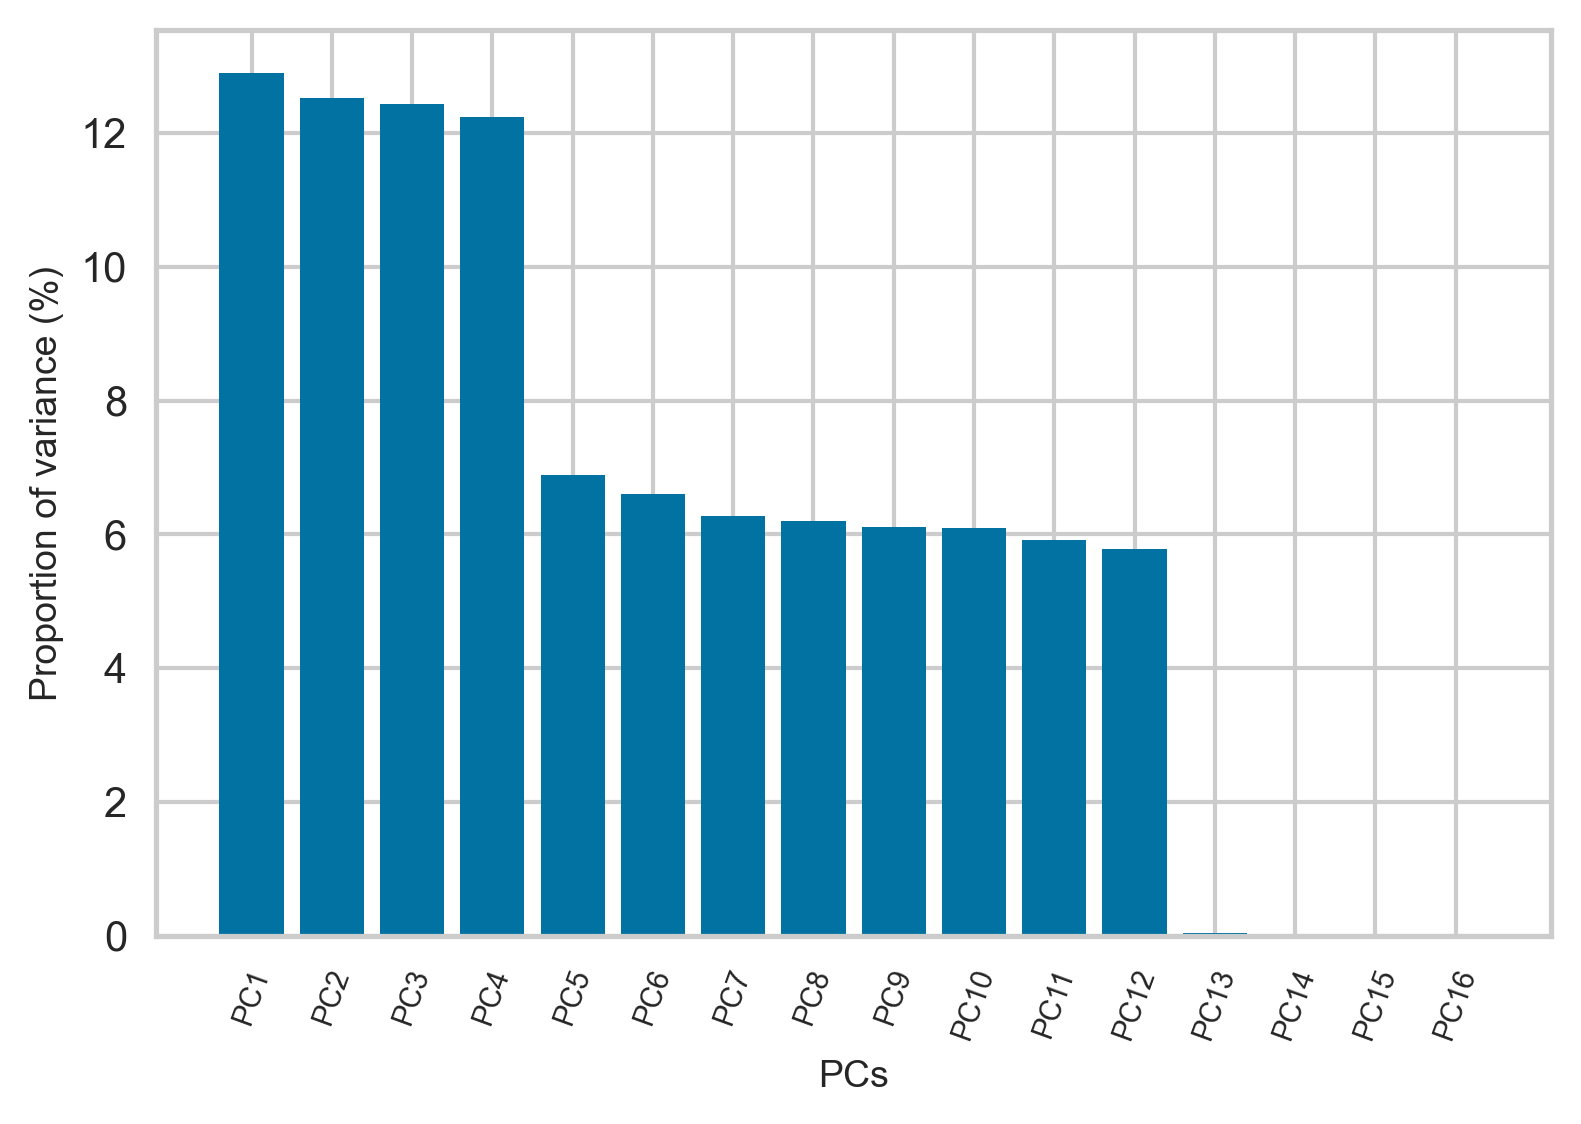

In [69]:
# get PCA loadings plots (2D and 3D)
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data_tr.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

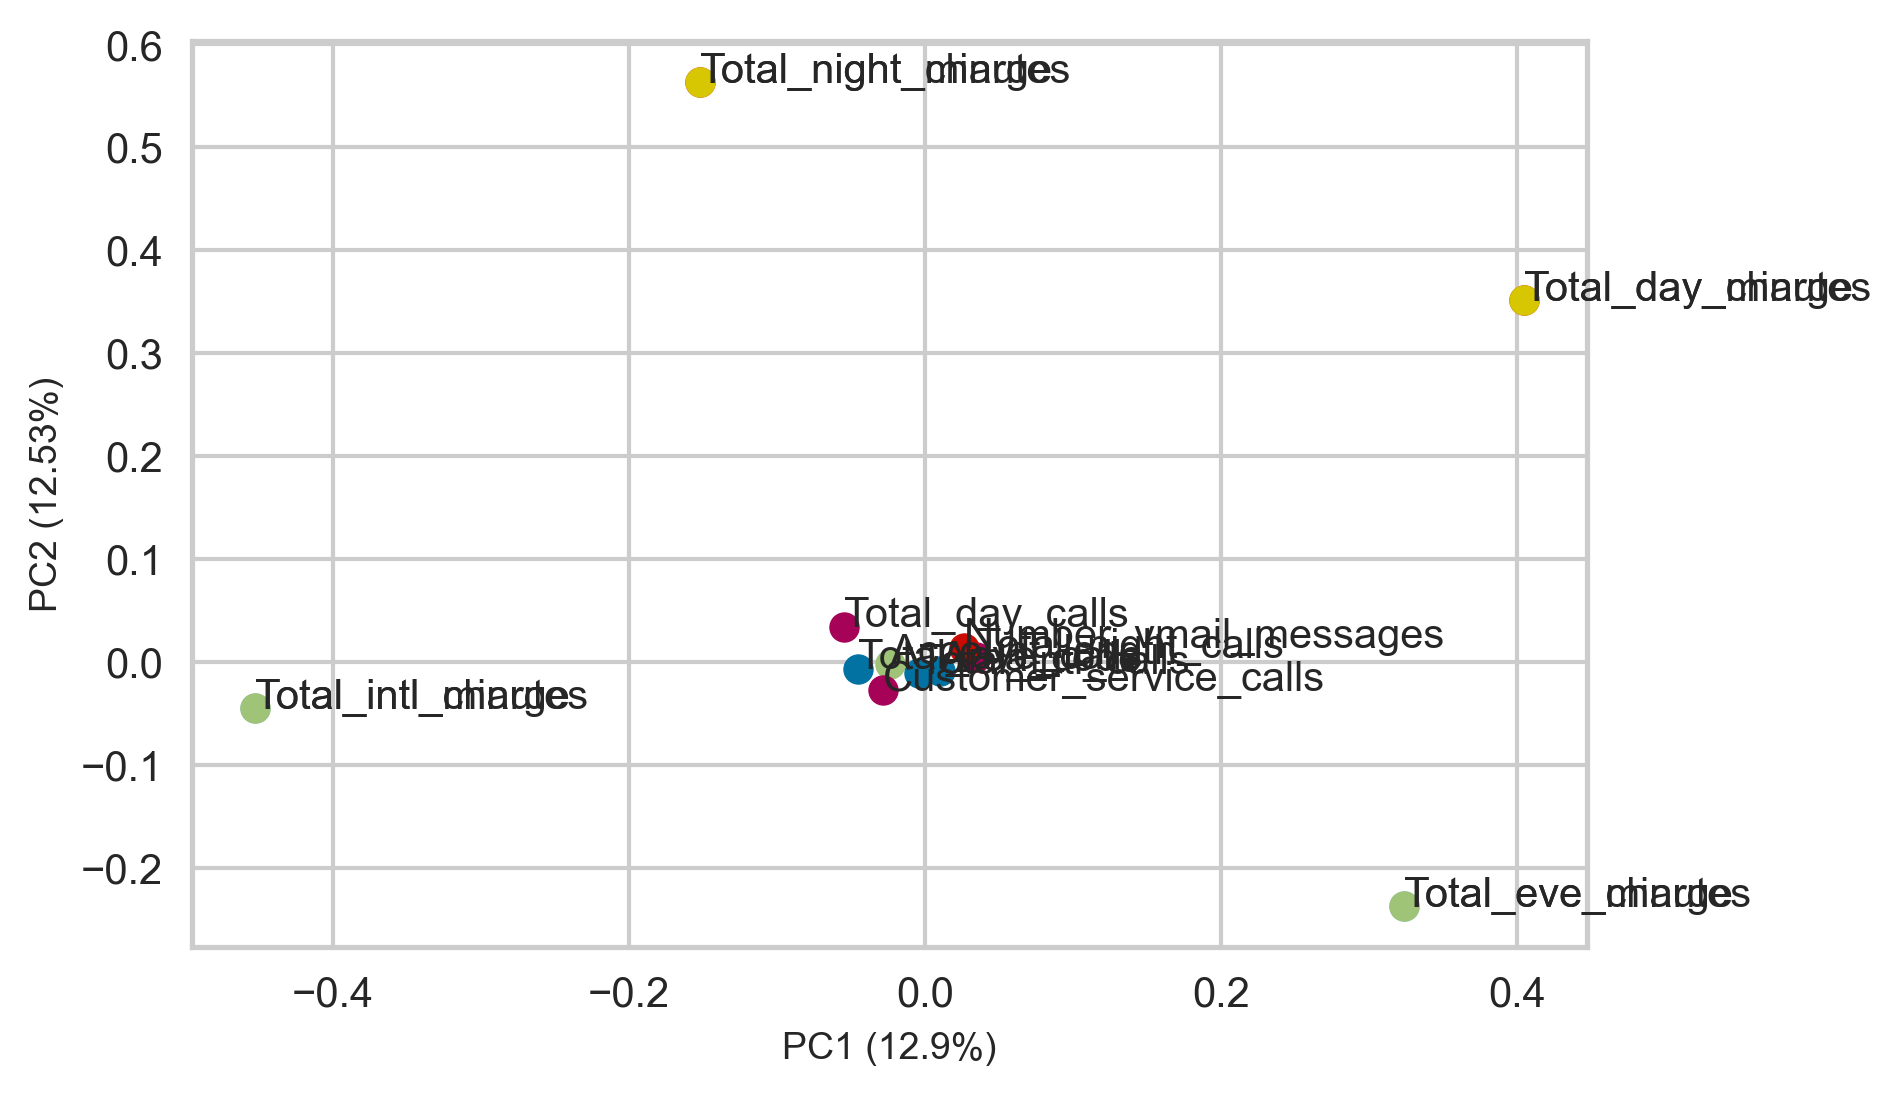

In [70]:
# get PC scores
pca_scores = PCA().fit_transform(data_tr)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data_tr.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist = data_labels, colordot = ['#00FF00','#FF0000'])

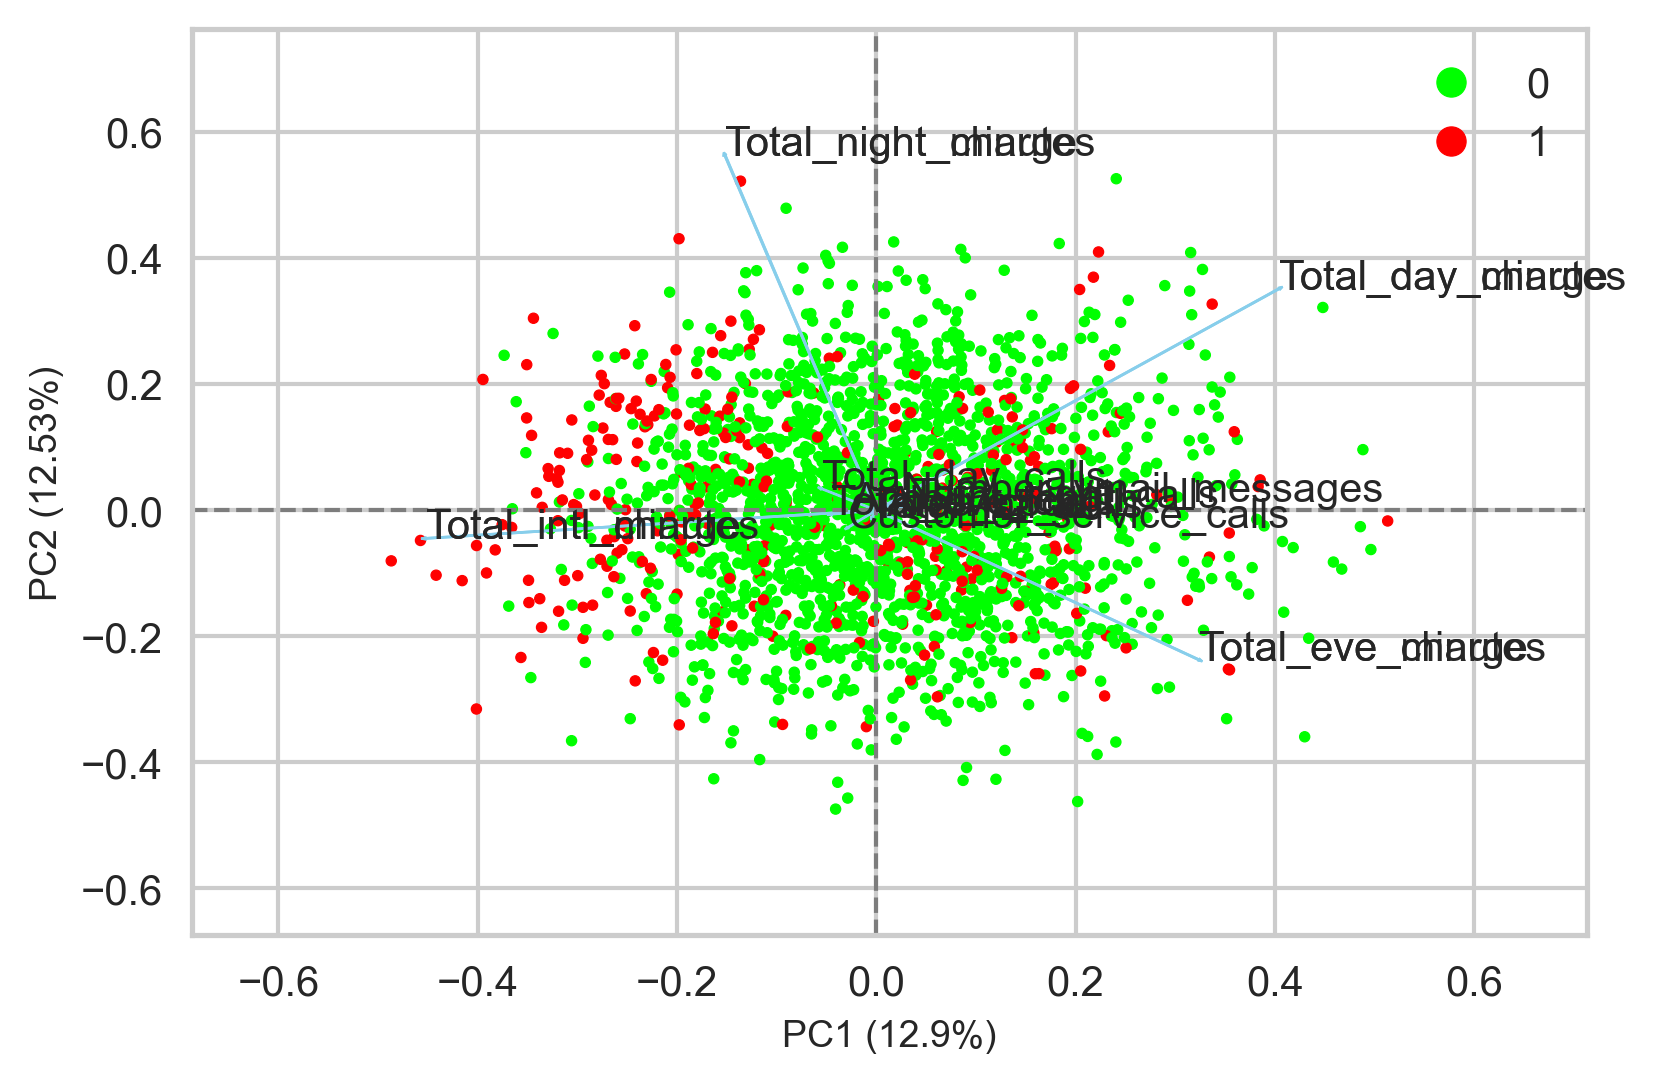

## Train test split

In [66]:
from sklearn import model_selection

X_train, X_val_test, y_train, y_val_test = model_selection.train_test_split(
    data_prepared, data_labels, test_size=0.3, random_state=42)

In [67]:
print(len(X_train))
print(len(X_val_test))
print(len(y_train))
print(len(y_val_test))

1492
640
1492
640


## Test validation split

In [68]:
X_val, X_test, y_val, y_test = model_selection.train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42)

In [69]:
print(len(X_val))
print(len(X_test))
print(len(y_val))
print(len(y_test))

320
320
320
320


In [70]:
X_val.shape

(320, 76)

In [71]:
extra_attribs = ["Total_calls","Total_mins","Total_charges"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs_0 = list(cat_encoder.categories_[0])
cat_one_hot_attribs_1 = list(cat_encoder.categories_[1])
cat_one_hot_attribs_2 = list(cat_encoder.categories_[2])
cat_one_hot_attribs_3 = list(cat_encoder.categories_[3])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs_0 + cat_one_hot_attribs_1 + cat_one_hot_attribs_2 + cat_one_hot_attribs_3 

## Evaluation Metrics

### ROC Curve

In [72]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### PR Curve

In [73]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### Classification Score

It gets the model and evaluates it for training and validation.

In [74]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### Classification Metrics

In [75]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

## Dealing with imbalanced classes

### Visualize support for each class

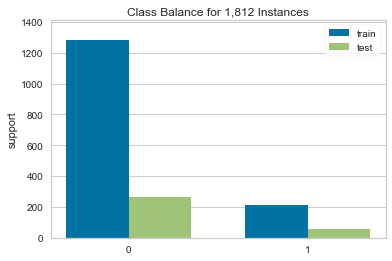

<AxesSubplot:title={'center':'Class Balance for 1,812 Instances'}, ylabel='support'>

In [76]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Balanced class weight - Combining Over Sampling and Under Sampling

### SMOTEENN

In [77]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

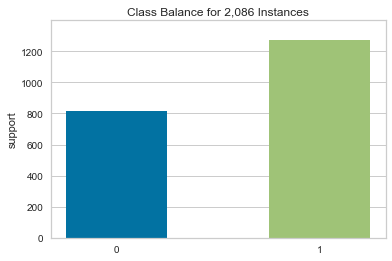

<AxesSubplot:title={'center':'Class Balance for 2,086 Instances'}, ylabel='support'>

In [78]:
# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train_smoteen)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Select and Train a Model

In [79]:
##Importing performance measure metrics
import timeit
from sklearn import metrics

## Dummy Classifier

In [80]:
from sklearn.dummy import DummyClassifier

In [81]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_smoteen, y_train_smoteen)

DummyClassifier(strategy='most_frequent')

Validation Result:

accuracy score: 0.1688



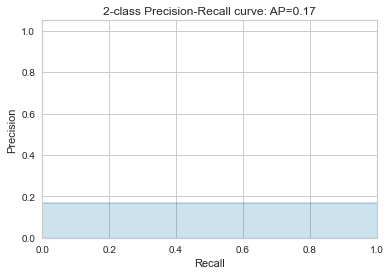

roc auc score: 0.5



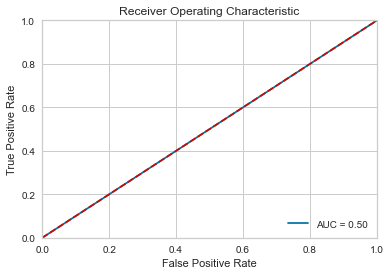

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       266
           1       0.17      1.00      0.29        54

    accuracy                           0.17       320
   macro avg       0.08      0.50      0.14       320
weighted avg       0.03      0.17      0.05       320


Confusion Matrix: 
 [[  0 266]
 [  0  54]]



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

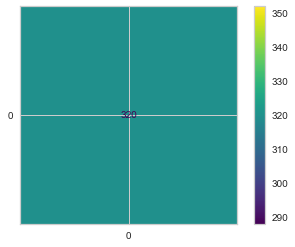

In [82]:
clf_score(dummy_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
log_clf = LogisticRegression()
log_clf.fit(X_train_smoteen, y_train_smoteen)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Validation Result:

accuracy score: 0.6531



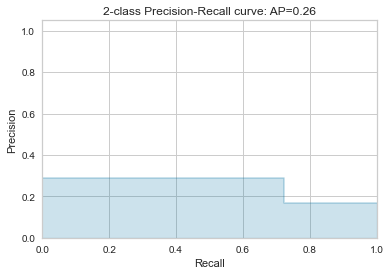

roc auc score: 0.6806599832915623



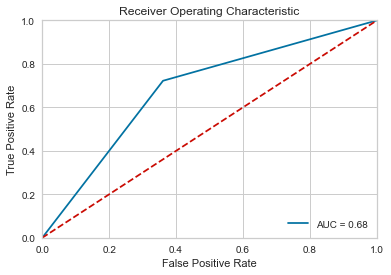

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.64      0.75       266
           1       0.29      0.72      0.41        54

    accuracy                           0.65       320
   macro avg       0.60      0.68      0.58       320
weighted avg       0.81      0.65      0.70       320


Confusion Matrix: 
 [[170  96]
 [ 15  39]]

End of validation Result



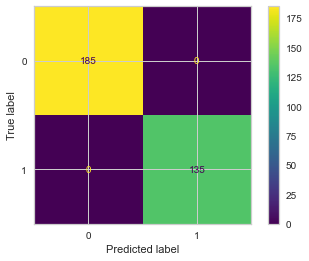

In [85]:
clf_score(log_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_smoteen, y_train_smoteen)

RandomForestClassifier()

Validation Result:

accuracy score: 0.9125



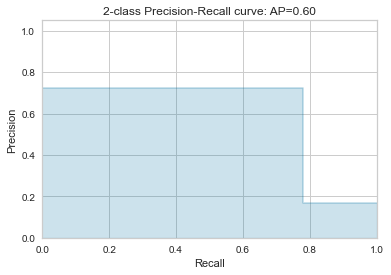

roc auc score: 0.858813700918964



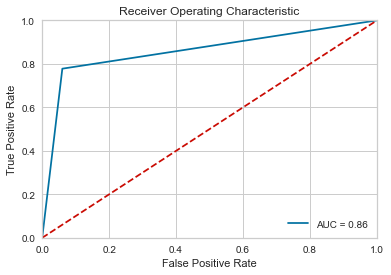

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.72      0.78      0.75        54

    accuracy                           0.91       320
   macro avg       0.84      0.86      0.85       320
weighted avg       0.92      0.91      0.91       320


Confusion Matrix: 
 [[250  16]
 [ 12  42]]

End of validation Result



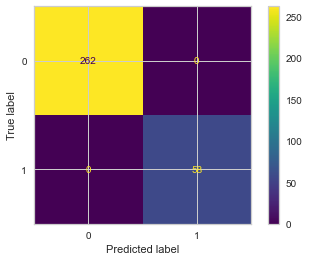

In [88]:
clf_score(rf_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_smoteen, y_train_smoteen)

GradientBoostingClassifier()

Validation Result:

accuracy score: 0.9125



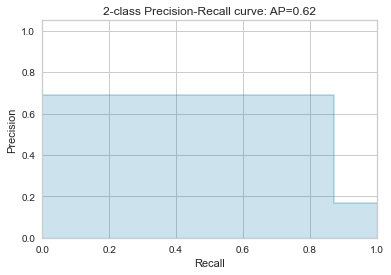

roc auc score: 0.8957115009746588



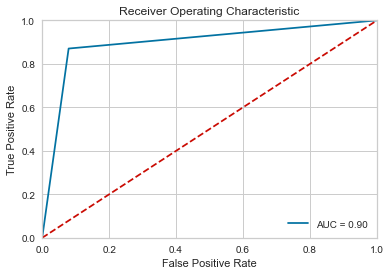

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       266
           1       0.69      0.87      0.77        54

    accuracy                           0.91       320
   macro avg       0.83      0.90      0.86       320
weighted avg       0.92      0.91      0.92       320


Confusion Matrix: 
 [[245  21]
 [  7  47]]

End of validation Result



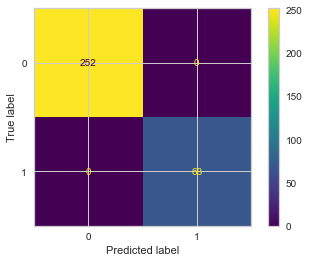

In [91]:
clf_score(gb_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## LGBM Classifier

In [92]:
from lightgbm import LGBMClassifier

In [93]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train_smoteen, y_train_smoteen)

LGBMClassifier()

Validation Result:

accuracy score: 0.9125



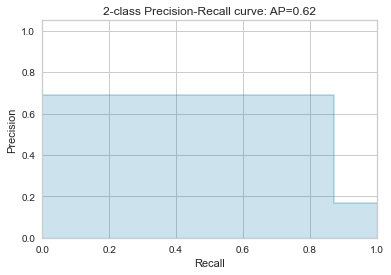

roc auc score: 0.8957115009746588



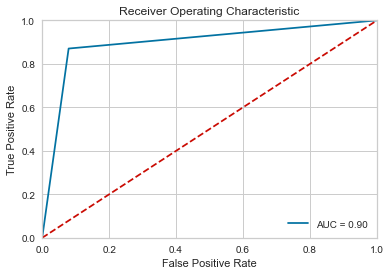

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       266
           1       0.69      0.87      0.77        54

    accuracy                           0.91       320
   macro avg       0.83      0.90      0.86       320
weighted avg       0.92      0.91      0.92       320


Confusion Matrix: 
 [[245  21]
 [  7  47]]

End of validation Result



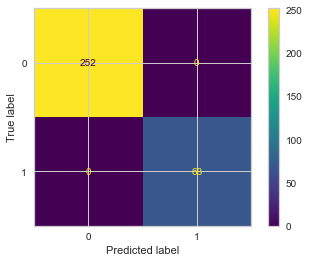

In [94]:
clf_score(gb_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

In [96]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_smoteen, y_train_smoteen)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Validation Result:

accuracy score: 0.9500



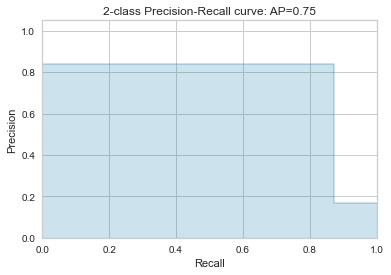

roc auc score: 0.9182678919521023



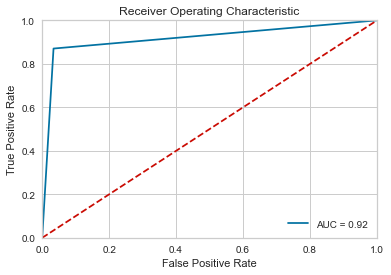

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.84      0.87      0.85        54

    accuracy                           0.95       320
   macro avg       0.91      0.92      0.91       320
weighted avg       0.95      0.95      0.95       320


Confusion Matrix: 
 [[257   9]
 [  7  47]]

End of validation Result



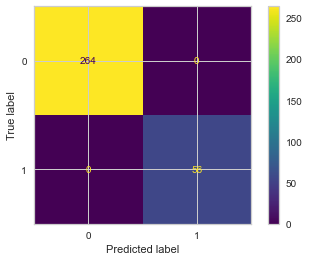

In [97]:
clf_score(xgb_clf, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

## AdaBoost

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [99]:
clf_ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_ada_boost.fit(X_train_smoteen, y_train_smoteen)

AdaBoostClassifier(n_estimators=100, random_state=42)

Validation Result:

accuracy score: 0.8094



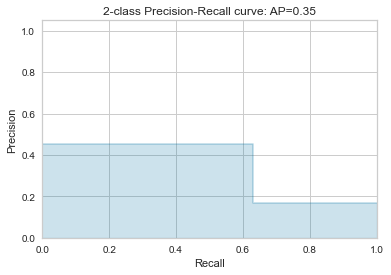

roc auc score: 0.7377471456418825



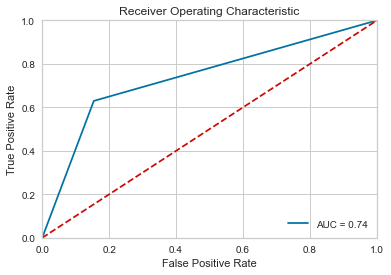

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       266
           1       0.45      0.63      0.53        54

    accuracy                           0.81       320
   macro avg       0.69      0.74      0.70       320
weighted avg       0.84      0.81      0.82       320


Confusion Matrix: 
 [[225  41]
 [ 20  34]]

End of validation Result



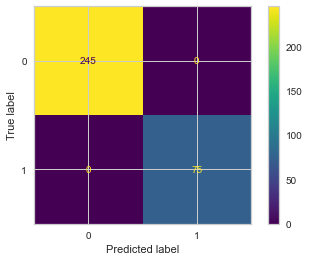

In [100]:
clf_score(clf_ada_boost, X_train_smoteen, y_train_smoteen, X_val, y_val, train=False)

### Evaluate model on test set

#### Class Prediction Error

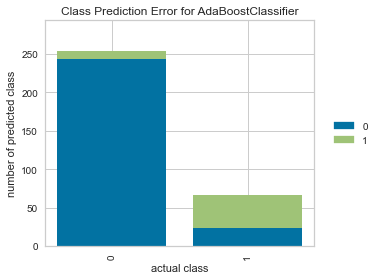

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [101]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_ada_boost, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### Classification Report

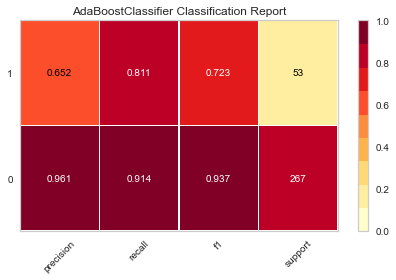

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [102]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_ada_boost, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Confusion Matrix

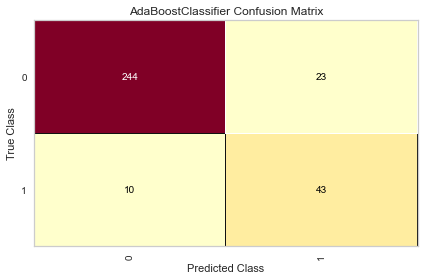

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [103]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_ada_boost, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

#### PR Curve

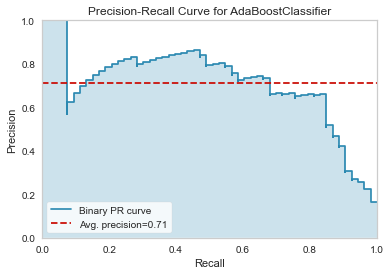

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [104]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(clf_ada_boost, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### ROC-AUC

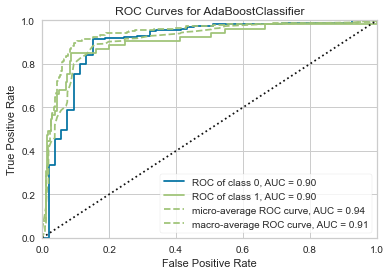

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [105]:
visualizer = ROCAUC(
    clf_ada_boost, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Validation Curve

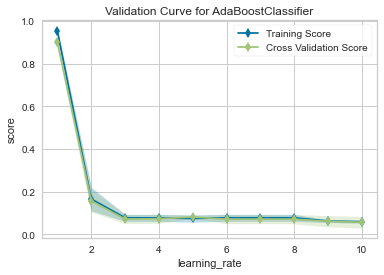

<AxesSubplot:title={'center':'Validation Curve for AdaBoostClassifier'}, xlabel='learning_rate', ylabel='score'>

In [106]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    AdaBoostClassifier(n_estimators=100, random_state=42), 
    param_name="learning_rate",
    param_range=np.arange(1, 11), 
    cv=5, 
    scoring="f1_weighted",
    np_jobs=8
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.poof()

#### Learning Curve

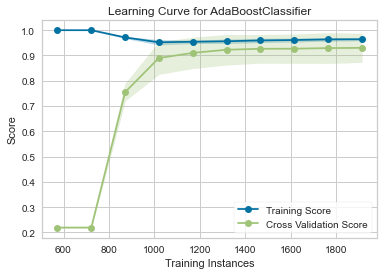

<AxesSubplot:title={'center':'Learning Curve for AdaBoostClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [107]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    AdaBoostClassifier(n_estimators=100, random_state=42), 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_smoteen, y_train_smoteen)        # Fit the data to the visualizer
visualizer.poof()                       # Finalize and render the figure

#### Discrimintation Threshold

#### Decision Function

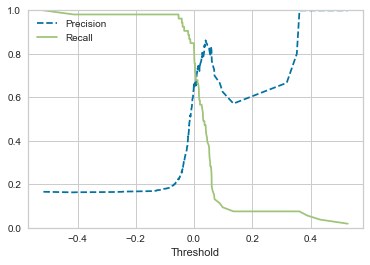

In [109]:
from sklearn.metrics import precision_recall_curve

# call decision_function on classifier to get scores (probas_pred)
probas_pred = clf_ada_boost.decision_function(X_test)
# compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred)
# precision and recall vs. the decision threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

#### Feature Importances

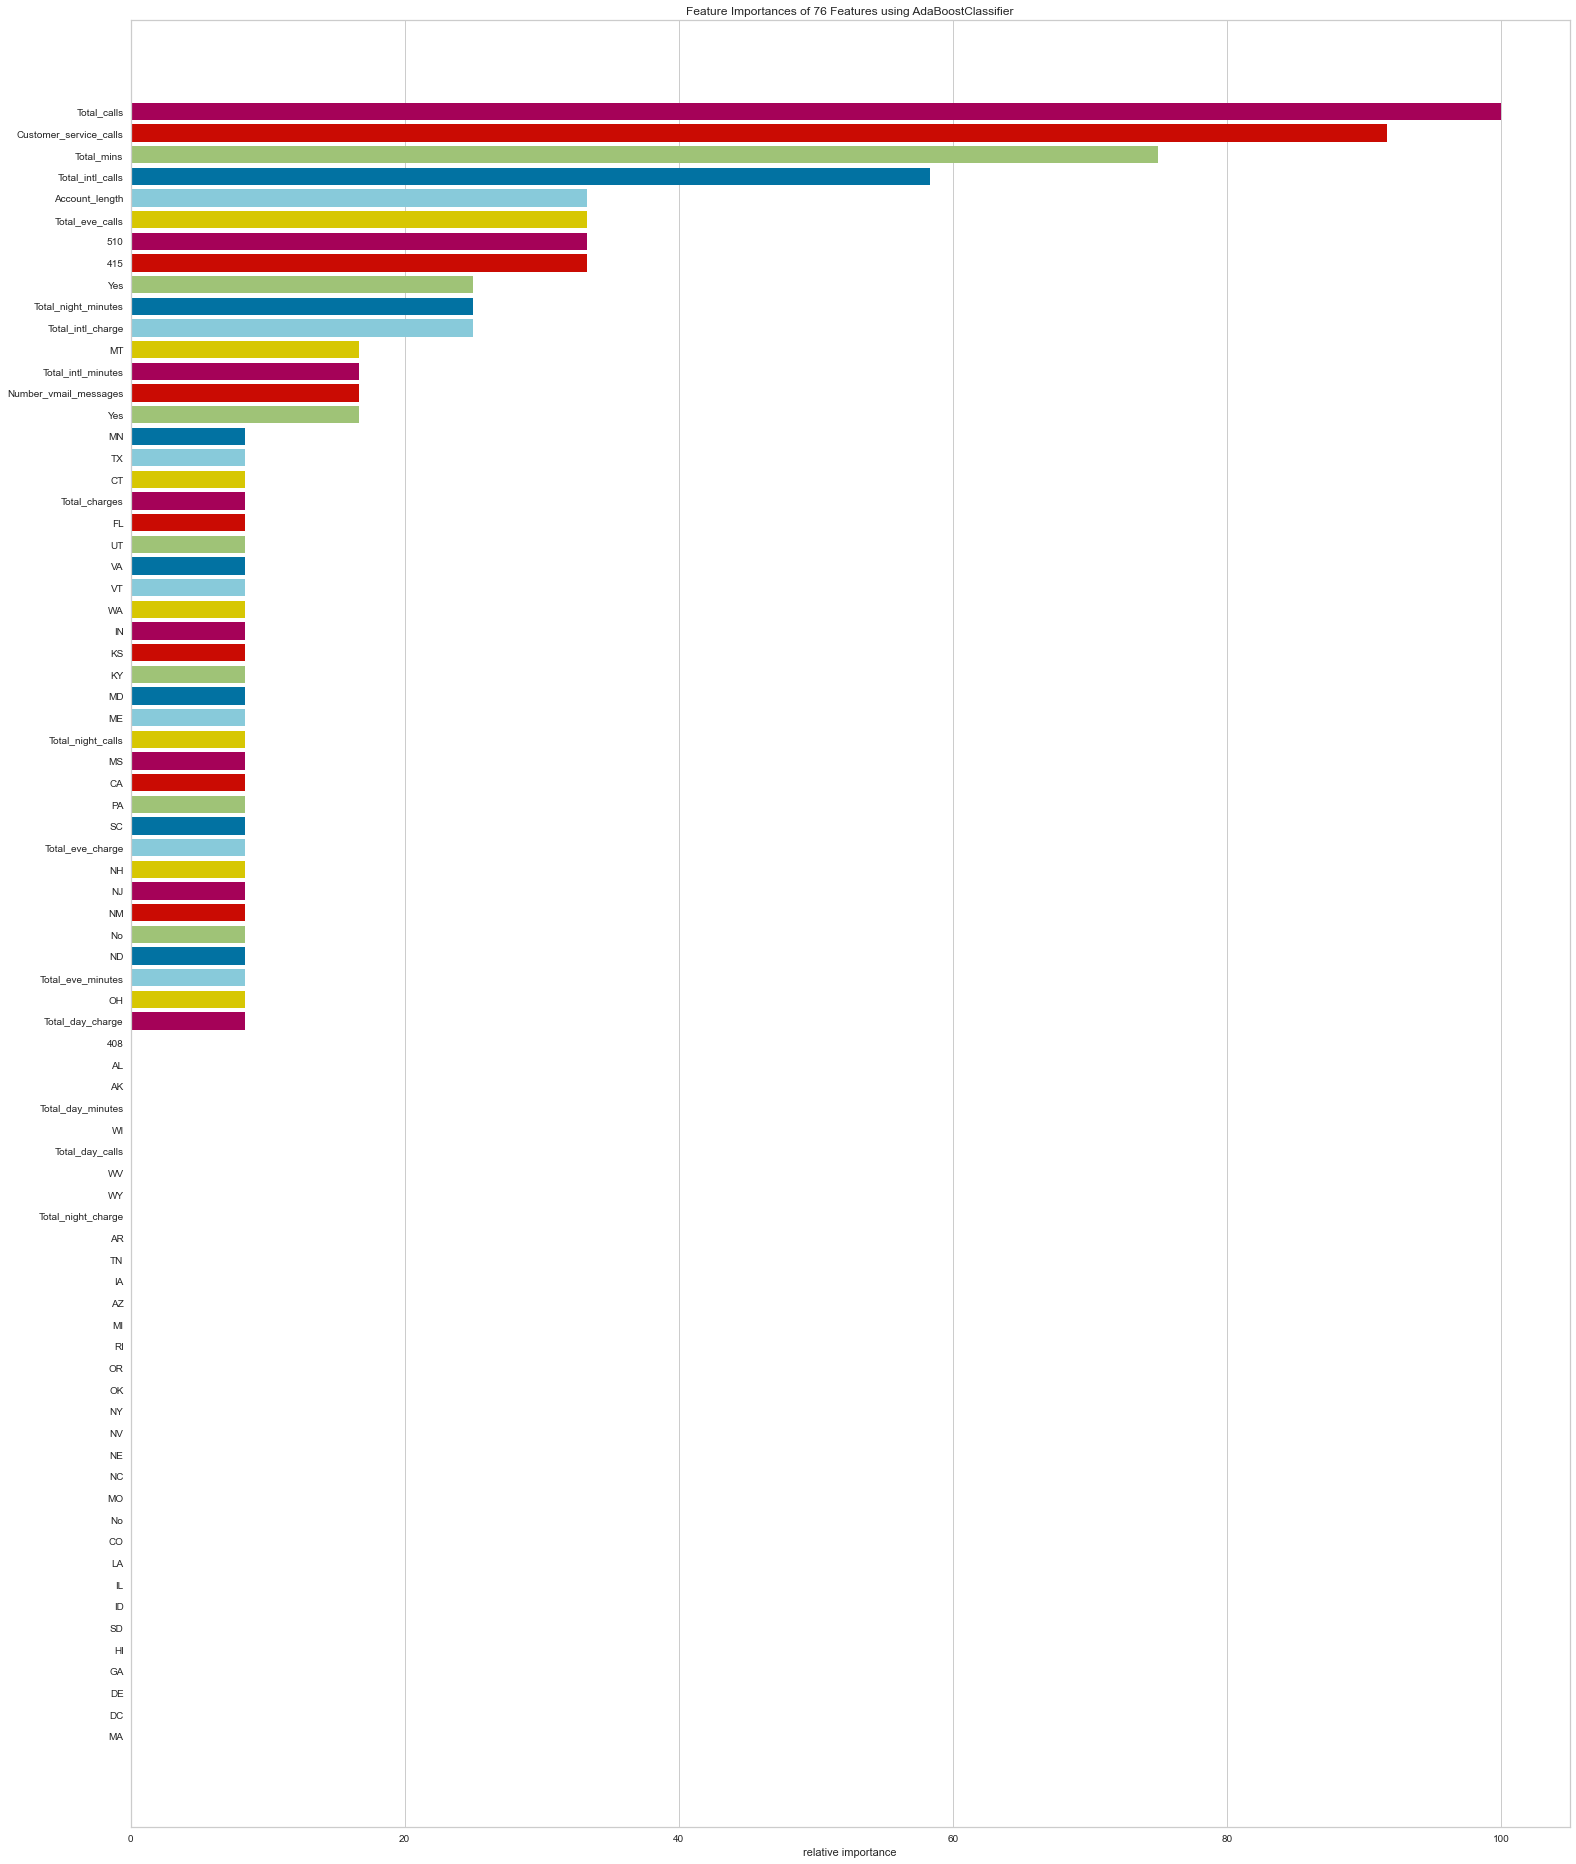

<AxesSubplot:title={'center':'Feature Importances of 76 Features using AdaBoostClassifier'}, xlabel='relative importance'>

In [110]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(clf_ada_boost, labels=attributes)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.poof()

### CatBoost

In [97]:
#!pip install catboost

In [98]:
from catboost import CatBoostClassifier, Pool

In [99]:
cls_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True,
                                  random_state = 42)

cls_cat_boost.fit(X_train_smoteen, y_train_smoteen)

0:	learn: 0.4391518	total: 154ms	remaining: 154ms
1:	learn: 0.3285170	total: 161ms	remaining: 0us


In [104]:
# make the prediction using the resulting model
preds_class = cls_cat_boost.predict(X_val)
preds_proba = cls_cat_boost.predict_proba(X_val)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
proba =  [[0.67754956 0.32245044]
 [0.81338529 0.18661471]
 [0.67754956 0.32245044]
 [0.81338529 0.18661471]
 [0.18856819 0.81143181]
 [0.81338529 0.18661471]
 [0.81338529 0.18661471]
 [0.02173092 0.97826908]
 [0.67754956 0.32245044]
 [0.18856819 0.81143181]
 [0.81338529 0.18661471]
 [0.81338529 0.18661471]
 [0.07526838 0.92473162]
 [0.813

##### Class Prediction 

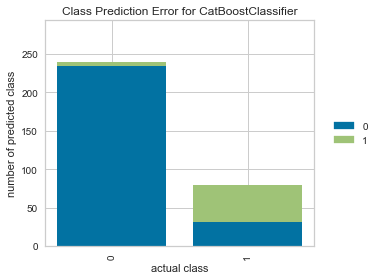

<AxesSubplot:title={'center':'Class Prediction Error for CatBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [106]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.contrib.wrapper import wrap
classes = ["0", "1"]

cat_boost_wrap = wrap(cls_cat_boost)

visualizer = ClassPredictionError(
    cat_boost_wrap, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

##### Classification Report

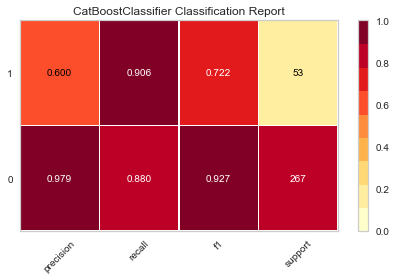

<AxesSubplot:title={'center':'CatBoostClassifier Classification Report'}>

In [107]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    cat_boost_wrap, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

##### Confusion Matrix

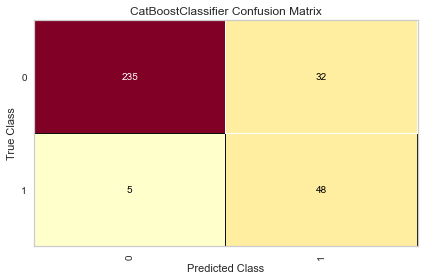

<AxesSubplot:title={'center':'CatBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [108]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(cat_boost_wrap, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

##### PR Curve

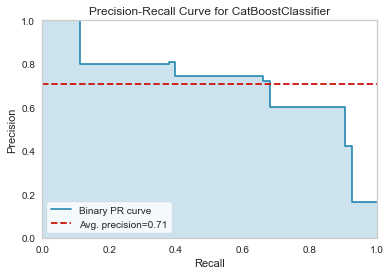

<AxesSubplot:title={'center':'Precision-Recall Curve for CatBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [109]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(cat_boost_wrap, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

##### ROC-AUC

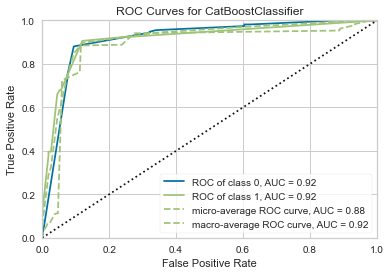

<AxesSubplot:title={'center':'ROC Curves for CatBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [110]:
visualizer = ROCAUC(
    cat_boost_wrap, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

##### Feature Importance

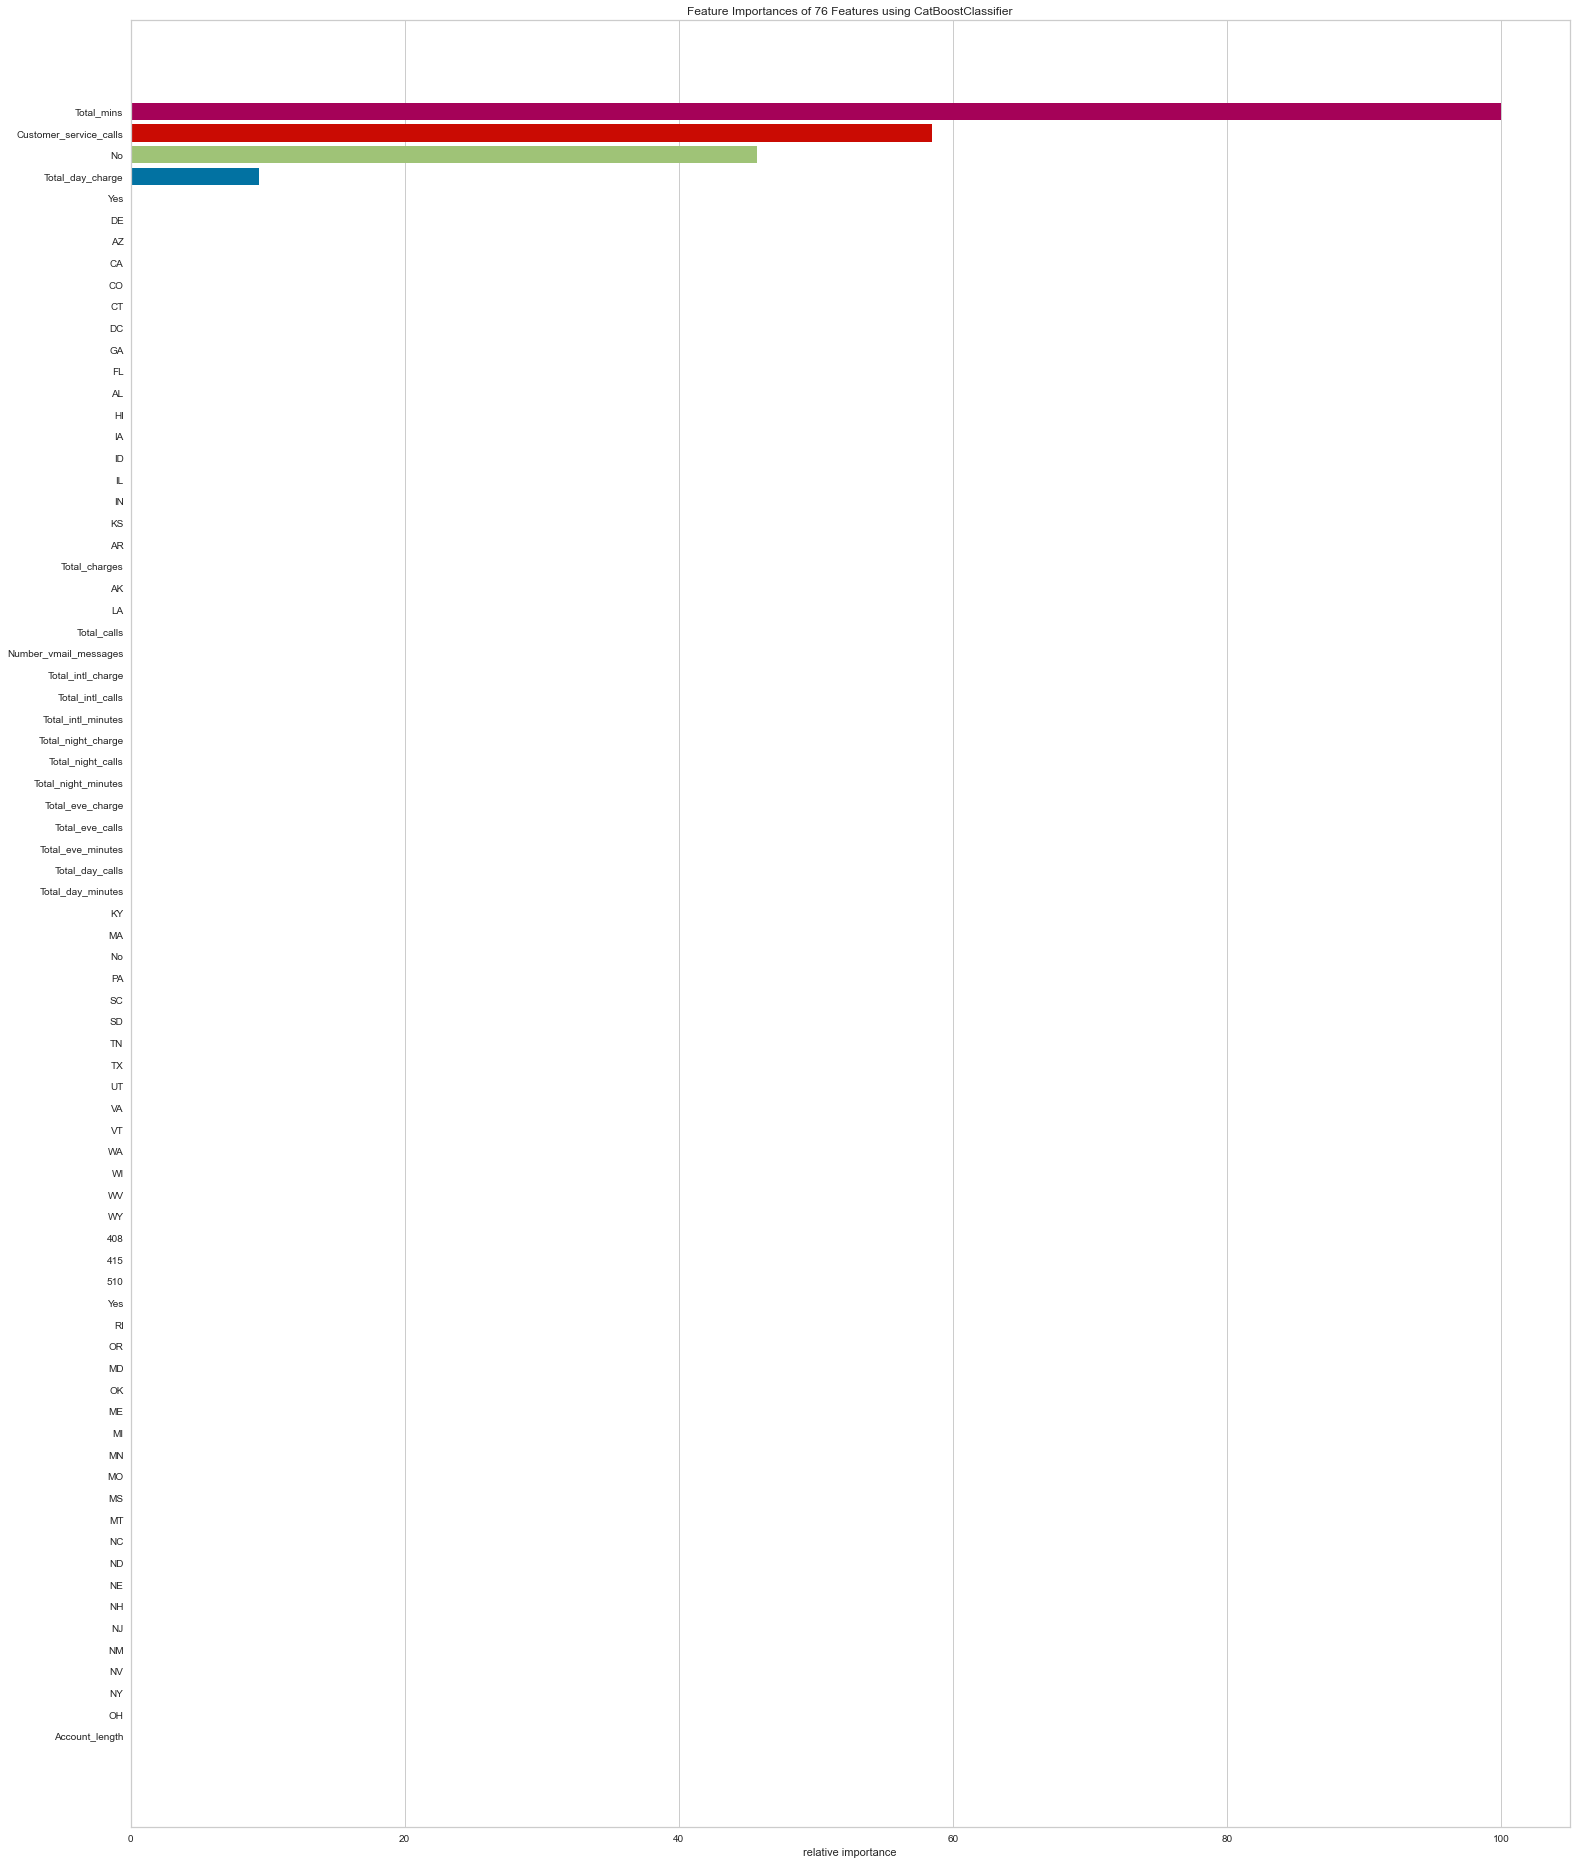

<AxesSubplot:title={'center':'Feature Importances of 76 Features using CatBoostClassifier'}, xlabel='relative importance'>

In [111]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(cat_boost_wrap, labels=attributes)
viz.fit(X_train_smoteen, y_train_smoteen)
viz.poof()

## Multi-Layer Perceptron

A simple ANN architecture with Keras

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
mlp = Sequential()
mlp.add(Dense(12, activation='relu', input_shape=(113,)))
mlp.add(Dense(8, activation= 'relu'))
mlp.add(Dense(1, activation='sigmoid'))

In [113]:
mlp.output_shape
mlp.summary()
mlp.get_config()
mlp.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                1368      
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________


[array([[-0.11229958,  0.10050546,  0.146987  , ..., -0.19455262,
          0.16069134, -0.09574766],
        [ 0.10684218, -0.15615083, -0.13084391, ..., -0.08285148,
          0.18927534, -0.08018541],
        [-0.06253044,  0.04658155,  0.17511298, ..., -0.20992331,
         -0.14731525,  0.14190517],
        ...,
        [-0.14422362, -0.00488552, -0.17226785, ...,  0.01923697,
          0.07552816, -0.11944365],
        [ 0.16207401, -0.08305134,  0.01277493, ...,  0.08804138,
          0.06580849, -0.18657854],
        [-0.21575879,  0.18867765,  0.19890352, ...,  0.09546737,
         -0.13670911,  0.18080924]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.37312573,  0.47228444,  0.33201176,  0.42182732, -0.4367621 ,
          0.03487068,  0.20680654, -0.0263769 ],
        [ 0.11831099,  0.20895523,  0.02039576,  0.10331094, -0.14394215,
          0.48329353, -0.09110603,  0.516948  ],
        [ 0.2601043 , -0.44611618,  0.4

## END